In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Data Using FER2013 after deleting error and cartoon image

In [2]:
data_dir = 'E://Kuliah//UPI//SEMESTER 8//dataset skripsi//fer2013v2_clean'

class_map = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Sad': 4,
    'Surprise': 5,
    'Neutral': 6,
}

In [3]:
image_data = []
labels = []

# Loop untuk setiap folder (kelas)
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Pastikan folder yang diambil adalah folder valid (bukan file atau lainnya)
    if os.path.isdir(class_path):
        label = class_map[class_folder]  # Ambil label sesuai map kelas

        # Loop untuk setiap gambar dalam folder kelas tersebut
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load gambar dengan OpenCV dalam bentuk grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pastikan gambar terbaca dengan benar
            if image is not None:
                # Flatten gambar menjadi 1D array dan ubah ke string terpisah dengan spasi
                image_flat = ' '.join(map(str, image.flatten()))

                # Simpan gambar dan labelnya
                image_data.append(image_flat)
                labels.append(label)

In [4]:
df = pd.DataFrame({
    'pixels': image_data,
    'emotion': labels,
})

In [5]:
df

,pixels,emotion
0,46 34 26 23 12 32 35 26 26 38 71 99 123 134 14...,0
1,55 33 54 32 26 21 50 29 38 45 79 73 43 22 51 5...,0
2,123 123 126 131 124 69 109 149 159 174 169 178...,0
3,255 255 255 255 255 255 255 255 255 251 254 16...,0
4,127 121 124 137 123 118 120 111 111 109 118 14...,0
...,...,...
33298,27 26 26 26 27 27 28 28 33 34 35 33 29 31 35 3...,5
33299,7 6 13 39 76 58 29 21 16 20 34 56 70 76 88 96 ...,5
33300,124 129 125 123 129 128 127 128 131 70 73 76 6...,5
33301,242 242 242 216 110 42 20 41 37 14 14 53 36 8 ...,5


In [17]:
df.to_csv('D://Kuliah//UPI//SEMESTER 8//dataset skripsi//fer2013v2_clean.csv', index=False)

In [3]:
df = pd.read_csv("E://Kuliah//UPI//SEMESTER 8//dataset skripsi//fer2013v2_clean.csv")
df.head()

,pixels,emotion
0,46 34 26 23 12 32 35 26 26 38 71 99 123 134 14...,0
1,55 33 54 32 26 21 50 29 38 45 79 73 43 22 51 5...,0
2,123 123 126 131 124 69 109 149 159 174 169 178...,0
3,255 255 255 255 255 255 255 255 255 251 254 16...,0
4,127 121 124 137 123 118 120 111 111 109 118 14...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pixels   33303 non-null  object
 1   emotion  33303 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 520.5+ KB


In [13]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,8714
1,Neutral,5945
2,Sad,5744
3,Fear,4714
4,Angry,4584
5,Surprise,3150
6,Disgust,452


C:\Users\MoKha\AppData\Local\Temp\ipykernel_17152\2950937820.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


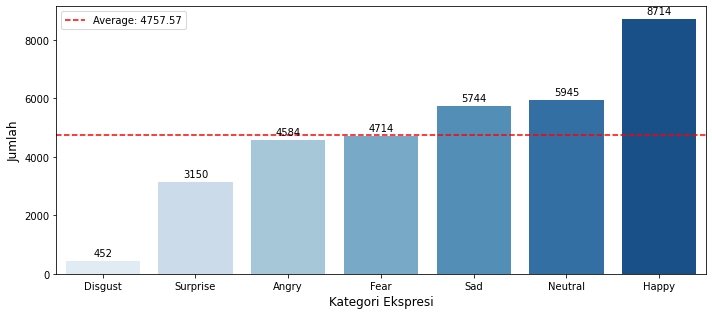

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort values
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True).reset_index(drop=True)

# Calculate the average count
average_count = emotion_counts_sorted['number'].mean()

# Plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
ax = sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)

# Title and labels
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Kategori Ekspresi', fontsize=12)

# Add horizontal average line
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')
plt.legend()

# Add counts above each bar
for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [7]:
data_train, data_test = train_test_split(df, test_size=0.1, stratify=df['emotion'])
data_train, data_val = train_test_split(data_train, test_size=0.1, stratify=data_train['emotion'])

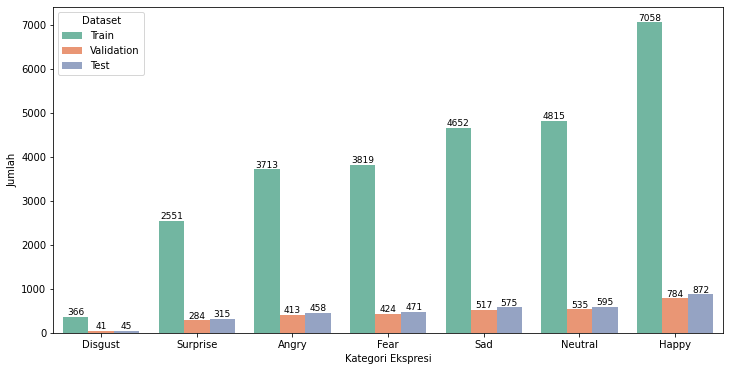

In [27]:
# Mapping label emosi ke nama
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

# Copy data dan tambah kolom 'set' dan 'emotion_label'
data_train_ = data_train.copy()
data_train_['set'] = 'Train'
data_train_['emotion_label'] = data_train_['emotion'].map(emotion_labels)

data_val_ = data_val.copy()
data_val_['set'] = 'Validation'
data_val_['emotion_label'] = data_val_['emotion'].map(emotion_labels)

data_test_ = data_test.copy()
data_test_['set'] = 'Test'
data_test_['emotion_label'] = data_test_['emotion'].map(emotion_labels)

# Gabungkan
combined = pd.concat([data_train_, data_val_, data_test_])

# Hitung total jumlah data per kategori emosi (gabungan train, val, test)
total_counts = combined['emotion_label'].value_counts()

# Urutan kategori emosi berdasarkan total_counts, descending
sorted_emotions = total_counts.sort_values(ascending=True).index.tolist()

plt.figure(figsize=(12,6))
ax = sns.countplot(x='emotion_label', hue='set', data=combined, palette='Set2', order=sorted_emotions)

plt.xlabel('Kategori Ekspresi')
plt.ylabel('Jumlah')
plt.legend(title='Dataset')

# Tambahkan label angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 5,  # posisi agak di atas bar
                f'{int(height)}', ha="center", va="bottom", fontsize=9)

plt.show()